In [1]:
!pip install pandas-datareader
!pip install yfinance

In [1]:
import numpy as np
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import xlsxwriter
import math
from pandas_datareader import data as pdr
from datetime import datetime
import os
import yfinance as yf
yf.pdr_override()

In [2]:
nse200 = pd.read_csv('ind_nifty200list.csv')
for i in range(len(nse200)):
    nse200['Symbol'][i] = nse200['Symbol'][i] + '.NS'
    
list_of_stocks = pd.DataFrame(nse200['Symbol'])
list_of_stocks


,Symbol
0,ACC.NS
1,AUBANK.NS
2,AARTIIND.NS
3,ADANIENT.NS
4,ADANIGREEN.NS
...,...
195,VOLTAS.NS
196,WHIRLPOOL.NS
197,WIPRO.NS
198,YESBANK.NS


In [3]:
start = datetime(2018,11,5)
end = datetime(2022,2,1)

In [4]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [5]:
#This function returns a pd dataframe with all of the adjusted closing information
def get_historical_Data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=start, end=end).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    print(names)
    return data

ticks = nse200['Symbol'].tolist()
d = get_historical_Data(ticks)
print(d.shape)
d.tail()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-21,2215.750000,1256.699951,1019.950012,1828.349976,1934.550049,723.900024,1827.300049,2066.800049,123.300003,302.899994,...,1566.349976,899.299988,915.849976,323.299988,11.85,1192.250000,1832.500000,605.049988,13.75,289.350006
2022-01-24,2167.449951,1229.500000,982.400024,1715.800049,1837.849976,702.450012,1781.150024,2035.900024,114.900002,284.549988,...,1523.800049,855.349976,900.650024,312.100006,10.95,1187.449951,1798.699951,572.750000,13.45,268.100006
2022-01-25,2179.949951,1246.449951,981.799988,1741.400024,1929.000000,711.099976,1825.199951,1992.449951,117.699997,289.450012,...,1557.949951,874.950012,872.700012,318.049988,11.30,1190.900024,1780.300049,562.700012,13.60,288.799988
2022-01-27,2167.699951,1275.699951,972.799988,1686.000000,1910.250000,709.099976,1830.750000,2009.300049,116.949997,284.299988,...,1507.199951,842.099976,864.000000,328.200012,10.65,1185.550049,1791.699951,544.750000,13.55,283.200012
2022-01-28,2215.949951,1271.550049,991.750000,1693.699951,1938.400024,710.150024,1830.900024,1986.800049,118.199997,287.750000,...,1549.849976,854.950012,886.500000,327.649994,10.80,1157.150024,1836.750000,552.150024,13.35,285.500000


In [6]:
ticks

['ACC.NS',
 'AUBANK.NS',
 'AARTIIND.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ATGL.NS',
 'ADANITRANS.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'AMARAJABAT.NS',
 'AMBUJACEM.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTRAL.NS',
 'AUROPHARMA.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALKRISIND.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BERGEPAINT.NS',
 'BEL.NS',
 'BHARATFORG.NS',
 'BHEL.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BIOCON.NS',
 'BOSCHLTD.NS',
 'BRITANNIA.NS',
 'CADILAHC.NS',
 'CANBK.NS',
 'CASTROLIND.NS',
 'CHOLAFIN.NS',
 'CIPLA.NS',
 'CUB.NS',
 'COALINDIA.NS',
 'COFORGE.NS',
 'COLPAL.NS',
 'CONCOR.NS',
 'COROMANDEL.NS',
 'CROMPTON.NS',
 'CUMMINSIND.NS',
 'DLF.NS',
 'DABUR.NS',
 'DALBHARAT.NS',
 'DEEPAKNTR.NS',
 'DHANI.NS',
 'DIVISLAB.NS',
 'DIXON.NS',
 'LALPATHLAB.NS',
 'DRREDDY.NS',
 'EICHER

In [7]:
corr_df = d.corr()
corr_df


,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
ACC.NS,1.000000,0.820567,0.896037,0.926840,0.794333,0.914058,0.898202,0.903774,0.730681,0.556457,...,0.711478,0.711757,0.904060,0.923551,0.039587,0.924029,0.306515,0.958537,-0.343777,0.000732
AUBANK.NS,0.820567,1.000000,0.811495,0.829098,0.779989,0.836603,0.774262,0.780637,0.676128,0.557350,...,0.513413,0.587409,0.878792,0.755395,-0.198787,0.884854,0.568610,0.813558,-0.531754,-0.213999
AARTIIND.NS,0.896037,0.811495,1.000000,0.969509,0.892441,0.900595,0.946411,0.940994,0.541678,0.394447,...,0.504034,0.712193,0.960423,0.879241,-0.131605,0.930404,0.458390,0.951569,-0.580856,-0.265305
ADANIENT.NS,0.926840,0.829098,0.969509,1.000000,0.879690,0.952743,0.978684,0.968644,0.666157,0.484732,...,0.578846,0.705533,0.948945,0.935235,-0.039882,0.946579,0.382396,0.965919,-0.483471,-0.154427
ADANIGREEN.NS,0.794333,0.779989,0.892441,0.879690,1.000000,0.852987,0.856713,0.840290,0.490692,0.218721,...,0.289559,0.529730,0.882595,0.749673,-0.082719,0.902582,0.561242,0.868721,-0.637077,-0.362716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOLTAS.NS,0.924029,0.884854,0.930404,0.946579,0.902582,0.937341,0.924070,0.932409,0.674474,0.518134,...,0.592822,0.715952,0.960525,0.894437,-0.071266,1.000000,0.515400,0.953326,-0.527213,-0.148108
WHIRLPOOL.NS,0.306515,0.568610,0.458390,0.382396,0.561242,0.392664,0.316983,0.332451,0.066282,-0.065306,...,-0.135823,0.173557,0.539883,0.166939,-0.564943,0.515400,1.000000,0.356796,-0.797152,-0.691467
WIPRO.NS,0.958537,0.813558,0.951569,0.965919,0.868721,0.928206,0.941567,0.941745,0.653732,0.482355,...,0.636570,0.714072,0.938361,0.935063,0.035820,0.953326,0.356796,1.000000,-0.430444,-0.086075
YESBANK.NS,-0.343777,-0.531754,-0.580856,-0.483471,-0.637077,-0.422817,-0.449548,-0.438096,0.046333,0.153814,...,0.200915,-0.262188,-0.599358,-0.226686,0.706423,-0.527213,-0.797152,-0.430444,1.000000,0.804981


In [8]:
corr_matrix = corr_df.to_numpy()
corr_matrix

array([[ 1.00000000e+00,  8.20566766e-01,  8.96036705e-01, ...,
         9.58537373e-01, -3.43777498e-01,  7.31573712e-04],
       [ 8.20566766e-01,  1.00000000e+00,  8.11495168e-01, ...,
         8.13558495e-01, -5.31753553e-01, -2.13998523e-01],
       [ 8.96036705e-01,  8.11495168e-01,  1.00000000e+00, ...,
         9.51569313e-01, -5.80856394e-01, -2.65305443e-01],
       ...,
       [ 9.58537373e-01,  8.13558495e-01,  9.51569313e-01, ...,
         1.00000000e+00, -4.30444006e-01, -8.60745821e-02],
       [-3.43777498e-01, -5.31753553e-01, -5.80856394e-01, ...,
        -4.30444006e-01,  1.00000000e+00,  8.04981025e-01],
       [ 7.31573712e-04, -2.13998523e-01, -2.65305443e-01, ...,
        -8.60745821e-02,  8.04981025e-01,  1.00000000e+00]])

In [9]:
threshold = 0.985

corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if corr_matrix[i,j] > threshold:
            corr_pairs.append([i,j])

print('Total number of correlation pairs = ',len(corr_pairs))


Total number of correlation pairs =  6


In [10]:
filtered_df = corr_df[(corr_df > threshold) & (corr_df !=1.000)]
filtered_df

,ACC.NS,AUBANK.NS,AARTIIND.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ATGL.NS,ADANITRANS.NS,ABCAPITAL.NS,ABFRL.NS,...,UBL.NS,MCDOWELL-N.NS,VBL.NS,VEDL.NS,IDEA.NS,VOLTAS.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
ACC.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUBANK.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AARTIIND.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIENT.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADANIGREEN.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOLTAS.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHIRLPOOL.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WIPRO.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YESBANK.NS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


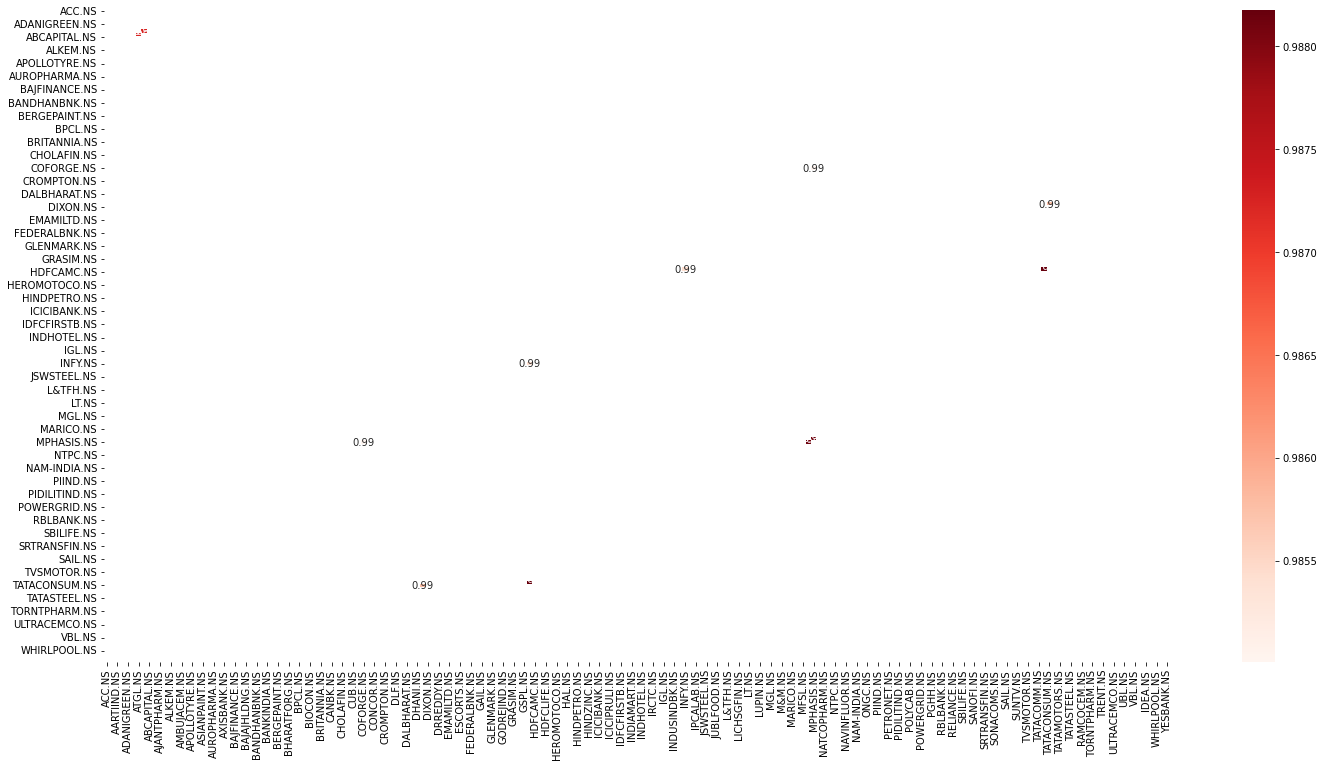

In [11]:
# filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
import seaborn as sn
plt.figure(figsize=(24,12))
sn.heatmap(filtered_df, annot=True, cmap="Reds")
plt.show()

In [12]:
sorted_mat = filtered_df.unstack().sort_values().drop_duplicates().dropna()
sorted_mat


COFORGE.NS   MPHASIS.NS       0.985007
HCLTECH.NS   INFY.NS          0.985418
DIVISLAB.NS  TATACONSUM.NS    0.985764
ATGL.NS      ADANITRANS.NS    0.987259
MINDTREE.NS  MPHASIS.NS       0.988123
HCLTECH.NS   TCS.NS           0.988176
dtype: float64

In [13]:
file_name = 'stocmks.xlsx'
  
# saving the excel
sorted_mat.to_csv(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [14]:
df2 = pd.read_csv('stocmks.xlsx')

In [15]:
my_columns = ("Stock_1","Stock_2","Corr")
df2.columns =  my_columns
df3  = df2.to_numpy()
print(df3)

[['COFORGE.NS' 'MPHASIS.NS' 0.9850069848045316]
 ['HCLTECH.NS' 'INFY.NS' 0.985417883011678]
 ['DIVISLAB.NS' 'TATACONSUM.NS' 0.9857642541930892]
 ['ATGL.NS' 'ADANITRANS.NS' 0.9872590580707112]
 ['MINDTREE.NS' 'MPHASIS.NS' 0.9881230014219788]
 ['HCLTECH.NS' 'TCS.NS' 0.9881757689443692]]


In [16]:
comp_set1 = pd.DataFrame(df2["Stock_1"])
comp_set1

,Stock_1
0,COFORGE.NS
1,HCLTECH.NS
2,DIVISLAB.NS
3,ATGL.NS
4,MINDTREE.NS
5,HCLTECH.NS


In [17]:
comp_set2 = pd.DataFrame(df2["Stock_2"])
comp_set2

,Stock_2
0,MPHASIS.NS
1,INFY.NS
2,TATACONSUM.NS
3,ADANITRANS.NS
4,MPHASIS.NS
5,TCS.NS


In [18]:
lists1 = []
lists2 = []
for list in df3:
    lists1.append(list[0])
    lists2.append(list[1])
unique_stock_list = lists1[:]
[unique_stock_list.append(i) for i in lists2 if i not in lists1] 


[None, None, None, None, None, None]

In [19]:
df_final_stocks = pd.DataFrame(unique_stock_list)
df_final_stocks

,0
0,COFORGE.NS
1,HCLTECH.NS
2,DIVISLAB.NS
3,ATGL.NS
4,MINDTREE.NS
5,HCLTECH.NS
6,MPHASIS.NS
7,INFY.NS
8,TATACONSUM.NS
9,ADANITRANS.NS


In [20]:
my_column1 = ["Symbl"]
df_final_stocks.columns = my_column1

In [23]:
df_final_stocks.to_csv('final_stocks_data.csv', index=False)
df_final_stocks

,Symbl
0,COFORGE.NS
1,HCLTECH.NS
2,DIVISLAB.NS
3,ATGL.NS
4,MINDTREE.NS
5,HCLTECH.NS
6,MPHASIS.NS
7,INFY.NS
8,TATACONSUM.NS
9,ADANITRANS.NS
